In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
Data = pd.read_csv(r"C:\Users\DELL\Downloads\SMA_data.csv")

In [3]:
Data

,Datetime,SMA
0,2018-01-01 04:34:10.320672,6864.691463
1,2018-01-01 12:37:36.596064,6864.689664
2,2018-01-01 20:31:55.898112,6864.688585
3,2018-01-02 05:42:49.014720,6864.684927
4,2018-01-02 12:13:01.263360,6864.682858
...,...,...
2286,2019-12-30 03:03:24.992640,6872.930137
2287,2019-12-30 11:05:46.768704,6872.928514
2288,2019-12-30 19:01:25.464576,6872.927281
2289,2019-12-31 10:44:01.110912,6872.923732


In [4]:
Data.isnull().sum()

Datetime    0
SMA         0
dtype: int64

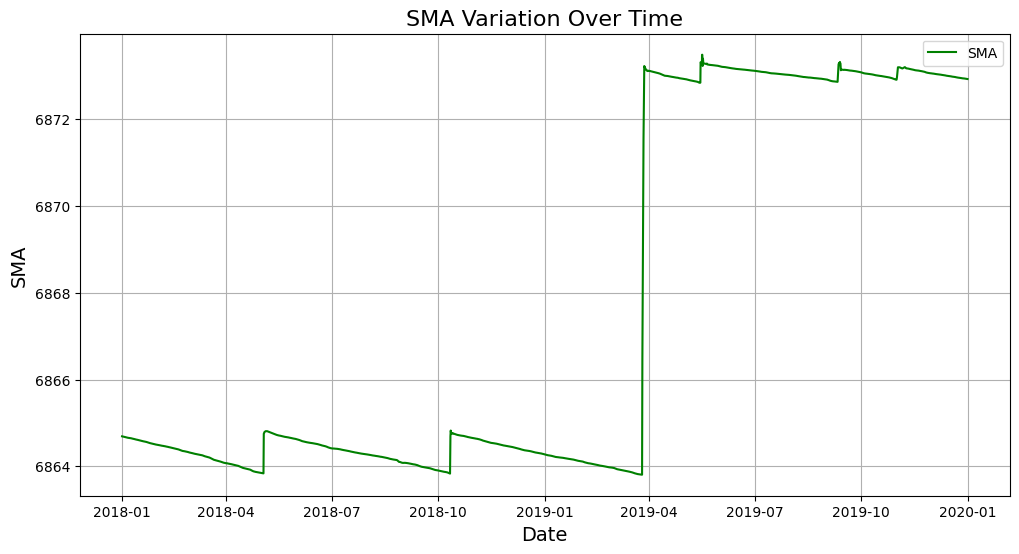

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Data['Datetime'] = pd.to_datetime(Data['Datetime'])

plt.figure(figsize=(12, 6))
plt.plot(Data['Datetime'], Data['SMA'], color='g', label='SMA')

plt.xlabel('Date', fontsize=14)
plt.ylabel('SMA', fontsize=14)
plt.title('SMA Variation Over Time', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

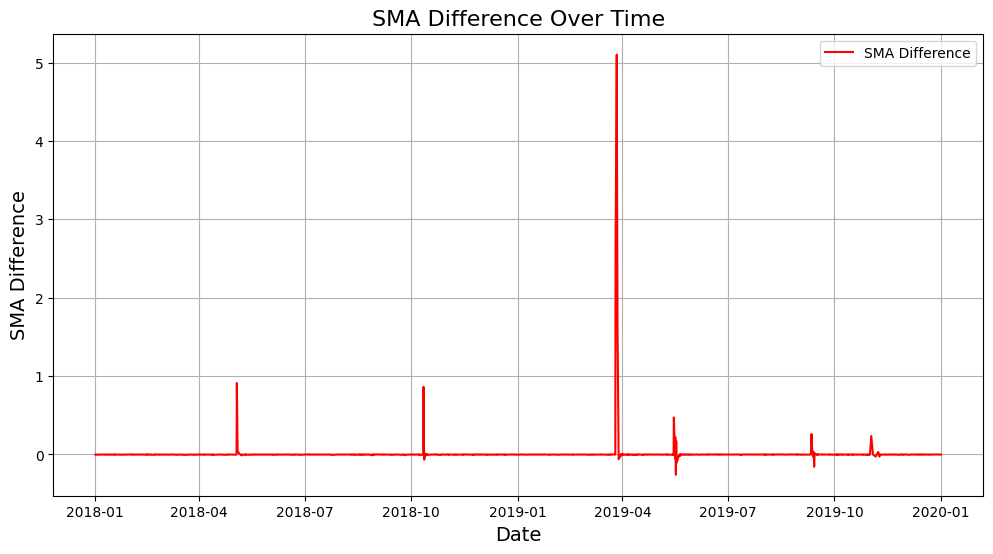

In [6]:
# Calculate the difference in SMA values between rows
Data['SMA_diff'] = Data['SMA'].diff()

# Visualize SMA differences
plt.figure(figsize=(12, 6))
plt.plot(Data['Datetime'], Data['SMA_diff'], color='r', label='SMA Difference')

plt.xlabel('Date', fontsize=14)
plt.ylabel('SMA Difference', fontsize=14)
plt.title('SMA Difference Over Time', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# threshold for detecting maneuvers
maneuver_threshold = 1

Data['Maneuver'] = (Data['SMA_diff'].abs() > maneuver_threshold).astype(int)
maneuver_data = Data[Data['Maneuver'] == 1]
print(maneuver_data[['Datetime', 'SMA', 'SMA_diff']])

                       Datetime          SMA  SMA_diff
1421 2019-03-26 04:53:33.243936  6866.447702  2.640831
1422 2019-03-27 04:34:36.436800  6871.548711  5.101009
1423 2019-03-27 20:25:37.599168  6873.222542  1.673831


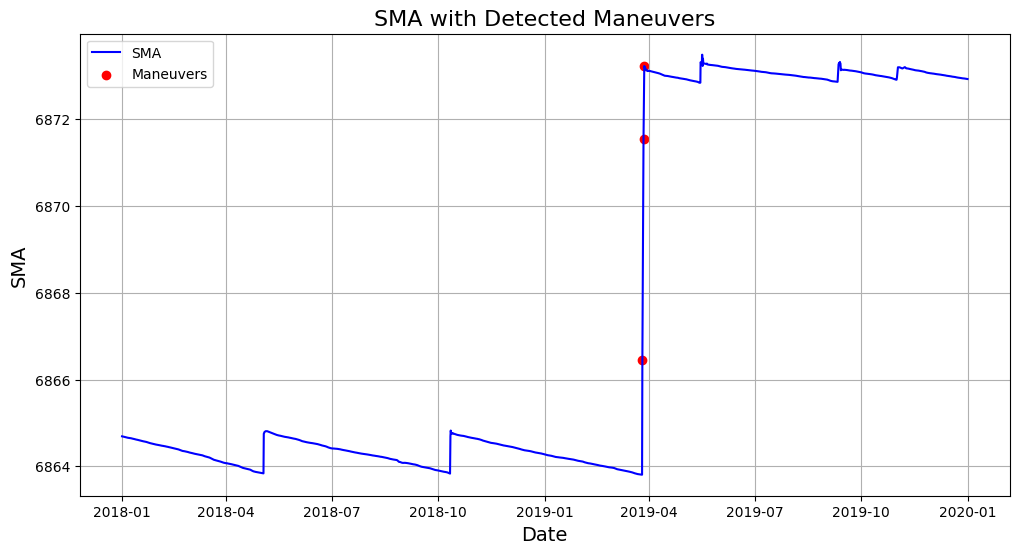

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(Data['Datetime'], Data['SMA'], color='b', label='SMA')
plt.scatter(maneuver_data['Datetime'], maneuver_data['SMA'], color='r', label='Maneuvers', marker='o')


plt.xlabel('Date', fontsize=14)
plt.ylabel('SMA', fontsize=14)
plt.title('SMA with Detected Maneuvers', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [9]:
Data

,Datetime,SMA,SMA_diff,Maneuver
0,2018-01-01 04:34:10.320672,6864.691463,NaN,0
1,2018-01-01 12:37:36.596064,6864.689664,-0.001799,0
2,2018-01-01 20:31:55.898112,6864.688585,-0.001079,0
3,2018-01-02 05:42:49.014720,6864.684927,-0.003658,0
4,2018-01-02 12:13:01.263360,6864.682858,-0.002069,0
...,...,...,...,...
2286,2019-12-30 03:03:24.992640,6872.930137,-0.001594,0
2287,2019-12-30 11:05:46.768704,6872.928514,-0.001624,0
2288,2019-12-30 19:01:25.464576,6872.927281,-0.001233,0
2289,2019-12-31 10:44:01.110912,6872.923732,-0.003548,0


In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Data)

                       Datetime          SMA  SMA_diff  Maneuver
0    2018-01-01 04:34:10.320672  6864.691463       NaN         0
1    2018-01-01 12:37:36.596064  6864.689664 -0.001799         0
2    2018-01-01 20:31:55.898112  6864.688585 -0.001079         0
3    2018-01-02 05:42:49.014720  6864.684927 -0.003658         0
4    2018-01-02 12:13:01.263360  6864.682858 -0.002069         0
5    2018-01-02 21:38:45.514752  6864.681269 -0.001589         0
6    2018-01-03 05:20:51.018144  6864.678421 -0.002848         0
7    2018-01-03 13:20:01.716288  6864.675902 -0.002518         0
8    2018-01-03 21:10:25.002048  6864.673984 -0.001919         0
9    2018-01-04 04:56:39.177600  6864.670266 -0.003718         0
10   2018-01-04 12:56:40.436160  6864.667987 -0.002279         0
11   2018-01-04 20:53:42.523584  6864.666518 -0.001469         0
12   2018-01-05 04:32:31.251840  6864.663790 -0.002728         0
13   2018-01-05 12:36:09.598176  6864.661631 -0.002159         0
14   2018-01-05 20:30:33.

In [11]:
Data['SMA_diff'] = Data['SMA_diff'].fillna(0)

In [12]:
Data.head()

,Datetime,SMA,SMA_diff,Maneuver
0,2018-01-01 04:34:10.320672,6864.691463,0.000000,0
1,2018-01-01 12:37:36.596064,6864.689664,-0.001799,0
2,2018-01-01 20:31:55.898112,6864.688585,-0.001079,0
3,2018-01-02 05:42:49.014720,6864.684927,-0.003658,0
4,2018-01-02 12:13:01.263360,6864.682858,-0.002069,0


               SMA  SMA_diff  Maneuver
SMA       1.000000  0.023002  0.023807
SMA_diff  0.023002  1.000000  0.882111
Maneuver  0.023807  0.882111  1.000000


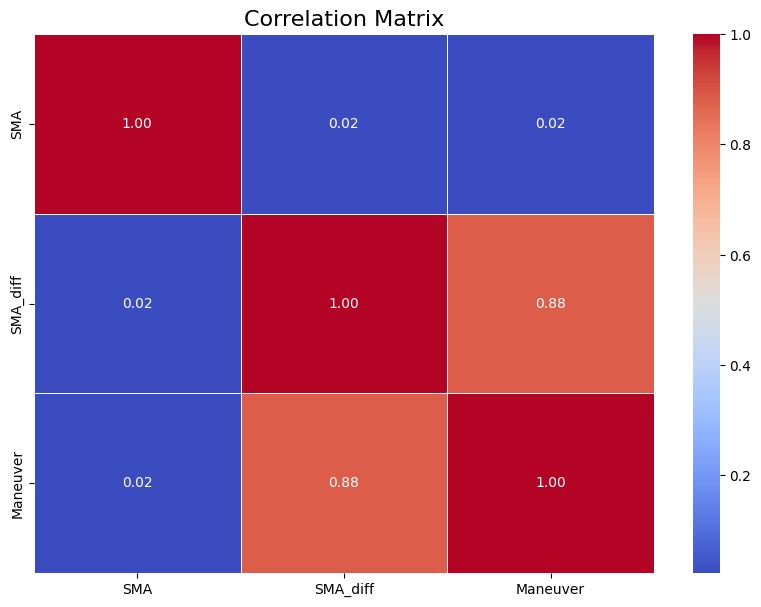

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = Data[['SMA', 'SMA_diff', 'Maneuver']].corr()
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

# Create lagged features without normalization
def create_lagged_features(data, lag=1):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

lag = 5  # Number of previous time steps to use as features
X, y = create_lagged_features(Data[['SMA']].values, lag)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(lag, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/20
103/103 [==============================] - 2s 8ms/step - loss: 41480688.0000 - val_loss: 31058508.0000
Epoch 2/20
103/103 [==============================] - 0s 5ms/step - loss: 20303250.0000 - val_loss: 9615276.0000
Epoch 3/20
103/103 [==============================] - 0s 5ms/step - loss: 2377489.2500 - val_loss: 183.8805
Epoch 4/20
103/103 [==============================] - 0s 4ms/step - loss: 117.0080 - val_loss: 0.0167
Epoch 5/20
103/103 [==============================] - 0s 4ms/step - loss: 0.0369 - val_loss: 1.0445e-04
Epoch 6/20
103/103 [==============================] - 0s 4ms/step - loss: 0.0360 - val_loss: 1.7191e-05
Epoch 7/20
103/103 [==============================] - 0s 4ms/step - loss: 0.0361 - val_loss: 1.7432e-06
Epoch 8/20
103/103 [==============================] - 0s 5ms/step - loss: 0.0360 - val_loss: 5.0308e-05
Epoch 9/20
103/103 [==============================] - 0s 4ms/step - loss: 0.0360 - val_loss: 1.5123e-04
Epoch 10/20
103/103 [======================

In [17]:
from sklearn.metrics import r2_score

# Prediction on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2}')

15/15 [==============================] - 0s 3ms/step
R² Score: 0.883586539681039


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

15/15 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.020832830901175894
Mean Squared Error (MSE): 0.0007936594810098112
Root Mean Squared Error (RMSE): 0.028171962675855783


In [35]:
from datetime import datetime
import numpy as np

def predict_sma(input_date_str, model, lag, scaler=None):
    input_date = datetime.strptime(input_date_str, "%Y-%m-%d %H:%M:%S")
    
    recent_data = Data[Data['Datetime'] <= input_date].tail(lag)  # Get last `lag` rows before the input date
    if len(recent_data) < lag:
        raise ValueError("Not enough data for the specified lag. Please provide a date with more historical data.")

    # Prepare input for the model
    sma_values = recent_data[['SMA']].values
    if scaler:
        sma_values = scaler.transform(sma_values) 
    X_input = sma_values.reshape((1, lag, 1))  

    # Predict SMA
    predicted_sma = model.predict(X_input)[0, 0]

    return predicted_sma


In [51]:
input_date_str = '2020-03-20 18:43:37'
predicted_sma, maneuver_predicted = predict_sma_and_maneuver(input_date_str, model, lag)

print(f"Predicted SMA: {predicted_sma}")

1/1 [==============================] - 0s 26ms/step
Predicted SMA: 6872.9404296875
